# ![](../Imagens/Titulo1_Limpeza_e_Transformacao.png)



# Introdução

Zomato é um aplicativo de entrega de comida da índia. A empresa disponibilizou no site [Kaggle](https://www.kaggle.com/datasets/anas123siddiqui/zomato-database?select=menu.csv), informações **reais** sobre os **clientes**, os pedidos, os **itens disponíveis no aplicativo** e os **restaurantes**. Este projeto será desenvolvido a partir destas informações.

# Objetivo
O objetivo inicial era criar um Sistema de Recomendação de categorias de comida. Porém, durante a Análise Exploratória, descobrimos que 96% dos clientes compram o mesmo tipo de comida.
<br>
Então, o novo objetivo é fazer uma Análise Exploratória dos dados e criar Regras de Associação dos itens.


<h2>Tabela de Conteúdo</h2>
<div>
  <a href="#introdução">Introdução</a> <br>
  <a href="#objetivo">Objetivo</a> <br>
  <a href="#carregar-dados">Carregar os dados</a> <br>
  <a href="#descrever-dados" >Descrever os dados <br>
    <ol style="list-style: none disc">
      <a href="#tabela_food">Tabela Food</a> <br>
      <a href="#tabela-menu">Tabela Menu</a><br>
      <a href="#tabela-orders">Tabela Orders</a> <br>
      <a href="#tabela-restaurant">Tabela Restaurant</a> <br>
      <a href="#tabela-users">Tabela Users</a> <br>
    </ol>
  </a>
  <a href="#unir-as-tabelas">Unir tabelas <br>
    <ol style="list-style: none disc">
      <a href="#tabelas-unidas">Tabelas unidas</a> <br>
      <a href="#verificar-os-dados">Verificar dados</a> <br>
    </ol>
  </a> 
  <a href="#limpeza-dos-dados"> Limpeza dos dados <br>
    <ol style="list-style:none disc">
      <a href="#valores-ausentes">Valores ausentes</a> <br>
      <a href="#trocar----por-0">Trocar ‘–’ por 0</a> <br>
      <a href="#linhas-duplicadas">Linhas Duplicadas</a> <br>
    </ol> 
  </a>
  <a href="#transformação-dos-dados">Transformação dos dados</a> <br>
    <ol style="list-style:none disc">
    <a href="#separar-as-categorias-de-restaurantes">Separar r_cuisine</a> <br>
      <a href="#verificar-tipo-de-dados">Verificar tipo de dados</a> <br>
      <a href="#coluna-n_avaliacoes">Coluna ‘n_avaliacoes’</a> <br>
      <a href="#coluna-veg_or_non_veg">Coluna ‘veg_or_non_veg’</a> <br>
      <a href="#separar-ano-mês-e-dia-do-pedido">Separar data</a> <br>
      <a href="#obter-dia-da-semana-do-pedido">Obter dia da semana</a> <br>
    </ol>  

  <a href="#outliers">Outliers</a> <br>
  <ul style="list-style:none;margin-left: -15px;">
    <a href="#função-que-calcula-o-resumo-estatístico-para-variáveis-númericas">Função 1</a> <br>
    <a href="#função-que-retorna-valor-único">Função 2</a> <br>
    <a href="#valor-total-do-pedido-em-usd">Valor Total do Pedido (em USD)</a> <br>
    <ul style="list-style:none;margin-left: -15px;"> <br>
      <a href="#verificar-valores-negativos">Verificar valores negativos</a> <br>
      <a href="#identificando-outliers">Identificando Outliers</a> <br>
      <a href="#escolhendo-o-ponto-de-corte-para-outliers">Escolhendo o ponto de corte para outliers</a> <br>
    </ul>
    <a href="#sales_qty">Sales_qty</a> <br>
    <ul>
      <a href="#grafico-boxplot">Gráfico Boxplot</a> <br>
      <a href="#escolher-o-ponto-de-corte-para-outliers">Escolher o ponto de corte para outliers</a> <br>
    </ul>
    <a href="#retirar-as-outliers">Retirar as Outliers</a> <br>
  </ul>
  <a href="#retirar-colunas">Retirar colunas</a> <br>
  <a href="#salvar-tabela-para-análise-descritiva">Salvar tab. Análise descritiva</a> <br>
  </ul>
 
</div>

# Carregar os dados

In [69]:
import pandas as pd
import os
#Definir o diretório
os.chdir('C:/0.Projetos/3.Analise_Exploratoria_Zomato/')
#carregar as bases de dados
f=pd.read_csv('Dataset_Original/food.csv')
m= pd.read_csv('Dataset_Original/menu.csv')
o= pd.read_csv('Dataset_Original/orders.csv')
r=pd.read_csv('Dataset_Original/restaurant.csv')
u=pd.read_csv('Dataset_Original/users.csv')


C:\Users\Usuário\AppData\Local\Temp\ipykernel_5376\1444801018.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  m= pd.read_csv('Dataset_Original/menu.csv')


# Descrever os dados
A base de dados contém 5 tabelas chamadas **Food** , **Menu** , **Orders** e **Restaurant** . 
<ul>
<li><b>Tabela Food:</b>contém informações sobre os diversos alimentos disponíveis no aplicativo.</li>
<li><b>Tabela Menu:</b>contém informações sobre os cardápios dos restaurantes.</li>
<li><b>Tabela Orders:</b>contém informações sobre os pedidos feitos pelos usuários no aplicativo.</li>
<li><b>Tabela Restaurant:</b>contém informações sobre os restaurantes disponíveis no app.</li>
<li><b>Tabela Users:</b> contém informações sobre os usuários cadastrados no aplicativo.</li>
</ul>



A seguir será feita a descrição de cada uma.E eventuais modicações. 

### Tabela Food
Contém informações sobre os diversos alimentos disponíveis no aplicativo. Tem 4 colunas:<br>
- Index: Índice da linha<br>
- f_id: identificador exclusivo de um item alimentar (371.561 valores únicos)<br>
- item: nome da comida (369.356 valores únicos)<br>
- veg_ou_non_veg: uma classificação binária de se o alimento é vegetariano ou não vegetariano<br>




In [70]:
#Primeiras linhas da tabela
f.head()

#Apagar a coluna 'Unnamed: 0'
f.drop('Unnamed: 0', axis=1, inplace=True)

### Tabela menu
Contém informações sobre os cardápios dos restaurantes. Tem 6 colunas:<br> 
- index: Índice da linha<br>
- menu_id: identificador exclusivo do menu (1.048.575 valores únicos)<br>
- r_id: identificador exclusivo do restaurante associado ao menu<br>
- f_id: identificador exclusivo do item alimentar no menu (371.561 valores únicos)<br>
- m_cuisine: tipo de cozinha a que pertence o item do menu<br>
- price: preço do item do menu na moeda especificada<br>


In [71]:
#Apagar a coluna 'Unnamed: 0'
m.drop('Unnamed: 0', axis=1, inplace=True)

#Renomear a linha cuisine para m_cuisine, pois existe outra tabela com uma coluna chamada cuisine 
m=m.rename(columns={'cuisine':'m_cuisine'})
#OBS: m_cuisine: tipo de cozinha a que pertence o item do menu

#Primeiras linhas da tabela
m.head()

,menu_id,r_id,f_id,m_cuisine,price
0,mn0,567335,fd0,"Beverages,Pizzas",40.0
1,mn0,567335,fd669322,"Beverages,Pizzas",40.0
2,mn328,158203,fd0,Beverages,65.0
3,mn328,158203,fd669322,Beverages,65.0
4,mn449,158203,fd0,Beverages,65.0


### Tabela Orders
Contém informações sobre os pedidos feitos pelos usuários no aplicativo. Tem 7 colunas:<br> 
- index: índices das linhas. <br>
- n_pedidos: número do pedido<br>
- order_date: a data e hora em que o pedido foi feito<br>
- sales_qty: quantidade de itens encomendados<br>
- sales_amount: valor total do pedido, incluindo quaisquer impostos e taxas<br>
- currency: moeda usada para o pedido (por exemplo, USD, EUR, INR, etc.)<br>
- user_id: o identificador exclusivo do usuário que fez o pedido<br>
- r_id:  identificador exclusivo do restaurante onde o pedido foi feito<br>



In [72]:
#Apagar a coluna 'Unnamed: 0'
o.drop('Unnamed: 0', axis=1, inplace=True)

#Primeiras linhas da tabela
o.head()

,order_date,sales_qty,sales_amount,currency,user_id,r_id
0,2017-10-10,100,41241,INR,49226,567335.0
1,2018-05-08,3,-1,INR,77359,531342.0
2,2018-04-06,1,875,INR,5321,158203.0
3,2018-04-11,1,583,INR,21343,187912.0
4,2018-06-18,6,7176,INR,75378,543530.0


Não existe uma coluna com ma identificação do número daquele pedido. Por isso, será criada uma.

In [73]:
#Descobrir número de linha da tabela orders
len(o)

150281

In [74]:
# Criando a nova coluna com valores de 1 a 150281
o['n_pedidos'] = range(1, 150282)
o.head()

,order_date,sales_qty,sales_amount,currency,user_id,r_id,n_pedidos
0,2017-10-10,100,41241,INR,49226,567335.0,1
1,2018-05-08,3,-1,INR,77359,531342.0,2
2,2018-04-06,1,875,INR,5321,158203.0,3
3,2018-04-11,1,583,INR,21343,187912.0,4
4,2018-06-18,6,7176,INR,75378,543530.0,5


In [75]:
# Reordenando as colunas para colocar 'n_pedidos' como a primeira
o = o[['n_pedidos'] + [n_pedidos for n_pedidos in o.columns if n_pedidos != 'n_pedidos']]
o.head()

,n_pedidos,order_date,sales_qty,sales_amount,currency,user_id,r_id
0,1,2017-10-10,100,41241,INR,49226,567335.0
1,2,2018-05-08,3,-1,INR,77359,531342.0
2,3,2018-04-06,1,875,INR,5321,158203.0
3,4,2018-04-11,1,583,INR,21343,187912.0
4,5,2018-06-18,6,7176,INR,75378,543530.0


### Tabela Restaurant
Contém informações sobre os restaurantes disponíveis no app.Tem 12 colunas:<br>
- index: índice das linhas<br>
- r_id: o identificador exclusivo do restaurante<br>
- restaurant_name: nome do restautante (112.819 valores únicos)<br>
- city: cidade onde o restaurante está localizado<br>
- ranting_restaurant: classificação média do restaurante, com base nas avaliações dos clientes<br>
- n_avalicoes: número de avaliações e comentários recebidos pelo restaurante<br>
- cost: estimativa do custo médio por pessoa para uma refeição no restaurante<br>
- r_cuisine: tipo de cozinha oferecida pelo restaurante<br>
- lic_no: número da licença do restaurante<br>
- link: link para o site do restaurante (148.541 valores únicos)<br>
- address: endereço (148.402 valores únicos)<br>
- menu (148541 valores únicos)<br>



In [76]:
#Primeiras linhas da tabela
r.head()
#Renomear algumas colunas que possuem o mesmo nome em outra tabela 
r=r.rename(columns={'id':'r_id'})
r=r.rename(columns={'name':'restaurant_name'})
r=r.rename(columns={'cuisine':'r_cuisine'})

#Renomear algumas colunas para facilitar a análise
r=r.rename(columns={'rating':'rating_restaurant'})
r=r.rename(columns={'rating_count':'n_avaliacoes'})

#Apagar a coluna 'Unnamed: 0'
r.drop('Unnamed: 0', axis=1, inplace=True)

#Primeiras linhas da tabela
r.head()

,r_id,restaurant_name,city,rating_restaurant,n_avaliacoes,cost,r_cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


### Tabela Users
Contém informações sobre os usuários cadastrados no aplicativo. Tem 12 colunas:<br>
- Index<br>
- user_id: identificador exclusivo do usuário<br>
- user_name: nome do usuário<br>
- email: endereço de email do usuário (85.662 valores únicos)<br>
- password: senha<br>
- age: idade<br>
- gender: gênero do usuário<br>
- marital Status: estado civil do usuário<br>
- occupation: ocupação do usuário<br>
- monthly Income: renda mensal do usuário<br>
- educational Qualifications: escolaridade do usuário<br>
- family size: número de membros na família<br>



In [77]:
u=u.rename(columns={'name':'user_name'})
#u.drop('Unnamed: 0', axis=1, inplace=True)
u.head()

,Unnamed: 0,user_id,user_name,email,password,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size
0,0,1,Claire Ferguson,fordanthony@example.net,NKz0fWDh!5,20,Female,Single,Student,No Income,Post Graduate,4
1,1,2,Jennifer Young,ann96@example.com,+i5Q91jt!s,24,Female,Single,Student,Below Rs.10000,Graduate,3
2,2,3,Jermaine Roberson,uwalker@example.org,eO4GqGusF(,22,Male,Single,Student,Below Rs.10000,Post Graduate,3
3,3,4,Rachel Carpenter,kimberlypatterson@example.net,d^c7O6odaS,22,Female,Single,Student,No Income,Graduate,6
4,4,5,Shawn Parker,daniellebennett@example.com,8J#E5RMl1o,22,Male,Single,Student,Below Rs.10000,Post Graduate,4


## Unir as tabelas

In [78]:
# Unir as tabelas
dados = pd.merge(f, m, on='f_id', how='inner')
dados = pd.merge(dados, o, on='r_id', how='inner')
dados = pd.merge(dados, u, on='user_id', how='inner')
dados = pd.merge(dados, r, on='r_id', how='inner')
dados.head()

,f_id,item,veg_or_non_veg,menu_id,r_id,m_cuisine,price,n_pedidos,order_date,sales_qty,...,restaurant_name,city,rating_restaurant,n_avaliacoes,cost,r_cuisine,lic_no,link,address,menu
0,fd0,Aloo Tikki Burger,Veg,mn0,567335,"Beverages,Pizzas",40.0,1,2017-10-10,100,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,fd1,Veg Creamy Burger,Veg,mn1,567335,"Beverages,Pizzas",50.0,1,2017-10-10,100,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
2,fd2,Cheese Burst Burger,Veg,mn2,567335,"Beverages,Pizzas",65.0,1,2017-10-10,100,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
3,fd3,Paneer Creamy Burger,Veg,mn3,567335,"Beverages,Pizzas",80.0,1,2017-10-10,100,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
4,fd4,Maxican Burger,Veg,mn4,567335,"Beverages,Pizzas",80.0,1,2017-10-10,100,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json


In [79]:
#Verificar o nome das colunas da nova tabela
dados.columns


Index(['f_id', 'item', 'veg_or_non_veg', 'menu_id', 'r_id', 'm_cuisine',
       'price', 'n_pedidos', 'order_date', 'sales_qty', 'sales_amount',
       'currency', 'user_id', 'Unnamed: 0', 'user_name', 'email', 'password',
       'Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'restaurant_name', 'city',
       'rating_restaurant', 'n_avaliacoes', 'cost', 'r_cuisine', 'lic_no',
       'link', 'address', 'menu'],
      dtype='object')

In [80]:
#Salvar a nova tabela
dados.to_csv('Outros_Datasets/tabelas_unidas.csv', index=False)

### Tabelas unidas 
A partir de agora será feita a limpeza e transformação usando a nova tabela.

In [81]:
import pandas as pd
#Importar a nova tabela
dados=pd.read_csv('Outros_Datasets/tabelas_unidas.csv')
dados.columns

C:\Users\Usuário\AppData\Local\Temp\ipykernel_5376\1580219703.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dados=pd.read_csv('Outros_Datasets/tabelas_unidas.csv')


Index(['f_id', 'item', 'veg_or_non_veg', 'menu_id', 'r_id', 'm_cuisine',
       'price', 'n_pedidos', 'order_date', 'sales_qty', 'sales_amount',
       'currency', 'user_id', 'Unnamed: 0', 'user_name', 'email', 'password',
       'Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'restaurant_name', 'city',
       'rating_restaurant', 'n_avaliacoes', 'cost', 'r_cuisine', 'lic_no',
       'link', 'address', 'menu'],
      dtype='object')

## Verificar os dados

In [82]:
dados.head()


,f_id,item,veg_or_non_veg,menu_id,r_id,m_cuisine,price,n_pedidos,order_date,sales_qty,...,restaurant_name,city,rating_restaurant,n_avaliacoes,cost,r_cuisine,lic_no,link,address,menu
0,fd0,Aloo Tikki Burger,Veg,mn0,567335,"Beverages,Pizzas",40.0,1,2017-10-10,100,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,fd1,Veg Creamy Burger,Veg,mn1,567335,"Beverages,Pizzas",50.0,1,2017-10-10,100,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
2,fd2,Cheese Burst Burger,Veg,mn2,567335,"Beverages,Pizzas",65.0,1,2017-10-10,100,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
3,fd3,Paneer Creamy Burger,Veg,mn3,567335,"Beverages,Pizzas",80.0,1,2017-10-10,100,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
4,fd4,Maxican Burger,Veg,mn4,567335,"Beverages,Pizzas",80.0,1,2017-10-10,100,...,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json


In [83]:
#Nº de linhas
len(dados)
#ou
#dados.shape[0]

1195056

In [84]:
#Nº de colunas
dados.shape[1]

34

A tabela unida tem 1.195.056 linhas e 32 colunas

In [34]:
dados['Family size'].unique()

array([6, 3, 1, 4, 2, 5], dtype=int64)

# Limpeza dos dados

### Valores ausentes

In [85]:
# Identificando valores ausentes em cada coluna
valores_ausentes = dados.isnull().sum()

# Calculando a porcentagem de valores ausentes em cada coluna
porcentagem_ausentes = (valores_ausentes / len(dados)) * 100

# Criando um DataFrame para exibir os resultados
resultados = pd.DataFrame({
    'Coluna': dados.columns,
    'Valores Ausentes': valores_ausentes,
    'Porcentagem Ausentes': porcentagem_ausentes
})

# Ordenando os resultados em ordem decrescente pela porcentagem de valores ausentes
resultados_ordenados = resultados.sort_values(by='Porcentagem Ausentes', ascending=False)

# Imprimindo os resultados ordenados
resultados_ordenados.head(10)


,Coluna,Valores Ausentes,Porcentagem Ausentes
item,item,920,0.076984
veg_or_non_veg,veg_or_non_veg,920,0.076984
lic_no,lic_no,829,0.069369
cost,cost,313,0.026191
restaurant_name,restaurant_name,0,0.000000
Marital Status,Marital Status,0,0.000000
Occupation,Occupation,0,0.000000
Monthly Income,Monthly Income,0,0.000000
Educational Qualifications,Educational Qualifications,0,0.000000
Family size,Family size,0,0.000000


A colunas item, veg_or_non_veg apresentam 7% de valores ausentes, a coluna lic apresenta 6.9%  e a coluna cost apresenta 2% de valores ausentes. Como esses valores são muito baixos e para estas colunas não faz sentido trocar por zero. As linhas com NAs serão eliminadas.

**Criar nova tabela**

In [86]:
#Eliminando as linhas com NAs
dados1 = dados.dropna()
#Nº de linhas
len(dados1)


1192994

In [87]:
dados1.columns

Index(['f_id', 'item', 'veg_or_non_veg', 'menu_id', 'r_id', 'm_cuisine',
       'price', 'n_pedidos', 'order_date', 'sales_qty', 'sales_amount',
       'currency', 'user_id', 'Unnamed: 0', 'user_name', 'email', 'password',
       'Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'restaurant_name', 'city',
       'rating_restaurant', 'n_avaliacoes', 'cost', 'r_cuisine', 'lic_no',
       'link', 'address', 'menu'],
      dtype='object')

### Retirar as linhas com '--' da coluna 'rating_restaurant'
Os valores '--' representam o número de restaurantes não avaliados. 43% dos restuarantes não foram avaliados.

In [88]:
dados1['rating_restaurant'].unique()

array(['--', '3.8', '4.5', '3.6', '3.7', '4.2', '3.9', '3.5', '4.0',
       '3.4', '4.3', '4.1', '4.6', '2.8', '3.1', '2.6', '4.4', '2.7',
       '3.0', '2.9', '3.2', '3.3', '4.8', '4.7', '5.0', '2.3', '1.9',
       '2.1', '2.5', '1.3', '1.8', '2.2', '4.9', '2.4', '1.6', '1.4',
       '2.0'], dtype=object)

**Criar nova tabela**

In [89]:
import pandas as pd
# Remover linhas que contêm '--' na coluna 'rating_restaurant'
dados2 = dados1[dados1['rating_restaurant'].apply(lambda cell: cell != '--')]

In [29]:
dados2['rating_restaurant'].unique()

array(['3.8', '4.5', '3.6', '3.7', '4.2', '3.9', '3.5', '4.0', '3.4',
       '4.3', '4.1', '4.6', '2.8', '3.1', '2.6', '4.4', '2.7', '3.0',
       '2.9', '3.2', '3.3', '4.8', '4.7', '5.0', '2.3', '1.9', '2.1',
       '2.5', '1.3', '1.8', '2.2', '4.9', '2.4', '1.6', '1.4', '2.0'],
      dtype=object)

**Checando número de linhas e colunas**

In [90]:
#Número de colunas
dados2.shape[1]

34

In [91]:
#Número de linhas antes da retirada de '--'
antes=dados1.shape[0]

#Número de linhas depois da retirada de '--'
depois=dados2.shape[0]

print(f"O número de linhas antes da retirada de '--' é de {antes:}" )
print(f"O número de linhas depois da retirada de '--' é de {depois:}" )

O número de linhas antes da retirada de '--' é de 1192994
O número de linhas depois da retirada de '--' é de 669882


**Porcentagem de linhas com '--'**

In [92]:
total_linhas_original=len(dados1)

# Número de linhas removidas
linhas_removidas = total_linhas_original - len(dados2)

# Calcular a porcentagem
porcentagem_removidas = (linhas_removidas / total_linhas_original) * 100

# Imprimir a porcentagem
print(f"A porcentagem de linhas removidas é: {porcentagem_removidas:.2f}%")

A porcentagem de linhas removidas é: 43.85%


# Do diretorio markdown
![](../Imagens/Limpeza_e_Transformação/card_porcentagem_restaurantes_nao_avaliados.png=100x20)

# Mistura
[<img src="../Imagens/Limpeza_e_Transformação/card_porcentagem_restaurantes_nao_avaliados.png" width="70%"/>](../Imagens/Limpeza_e_Transformação/card_porcentagem_restaurantes_nao_avaliados.png)

# Do Github
![g](https://github.com/CatarinaAguiar3/Analise_Exploratoria_dos_dados_do_delivery_Zomato/blob/main/Imagens/Limpeza_e_Transforma%C3%A7%C3%A3o/card_porcentagem_restaurantes_nao_avaliados.png)

<img src="https://github.com/CatarinaAguiar3/Analise_Exploratoria_dos_dados_do_delivery_Zomato/blob/main/Imagens/Limpeza_e_Transforma%C3%A7%C3%A3o/card_porcentagem_restaurantes_nao_avaliados.png" width="70%">

In [93]:
#Verificar quantidade de cidades
dados2['city'].nunique()

59

### Linhas Duplicadas
Verificar e remover as linhas duplicadas

**Criar nova tabela**

In [98]:
# Remover as linhas duplicadas
dados3 = dados2.drop_duplicates()
#Nº de linhas
len(dados3)


669882

In [99]:
# Salvando no formato CSV
dados3.to_csv('dados3.csv', index=False)

## Transformação dos dados

### Separar as categorias de restaurantes
Existem 862 categorias de restaurantes. E em algumas linhas, as categorias estão agrupadas em duas. Portanto, agora o objetivo é separar estas categorias, deixando-as em uma única linha cada.   

In [100]:
#Verificar valores únicos da coluna r_cuisine 
df_unicos= pd.DataFrame({'r_cuisine': dados3['r_cuisine'].unique()})
df_unicos

,r_cuisine
0,Beverages
1,Desserts
2,Continental
3,"Bakery,Beverages"
4,"Bakery,Pizzas"
...,...
621,Hyderabadi
622,"Healthy Food,Juices"
623,Thai
624,"Healthy Food,Indian"


**Criar nova tabela com as novas categorias de restaurante simplificadas**

In [101]:
import pandas as pd
dados3=pd.read_csv('Outros_Datasets/dados3.csv')
#Criar uma nova tabela com as novas categorias de restaurante
dados4=dados3
#Remover os valores depois da vírgula
dados4['r_cuisine1'] = dados4['r_cuisine'].apply(lambda x: x.split(',')[0])


C:\Users\Usuário\AppData\Local\Temp\ipykernel_5376\2936626114.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  dados3=pd.read_csv('Outros_Datasets/dados3.csv')


In [102]:
dados4.head(3)

,f_id,item,veg_or_non_veg,menu_id,r_id,m_cuisine,price,n_pedidos,order_date,sales_qty,...,city,rating_restaurant,n_avaliacoes,cost,r_cuisine,lic_no,link,address,menu,r_cuisine1
0,fd0,Aloo Tikki Burger,Veg,mn328,158203,Beverages,65.0,3,2018-04-06,1,...,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Beverages
1,fd0,Aloo Tikki Burger,Veg,mn449,158203,Beverages,65.0,3,2018-04-06,1,...,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Beverages
2,fd35,Paneer Tikka Sandwich,Veg,mn333,158203,Beverages,145.0,3,2018-04-06,1,...,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Beverages


In [103]:
#Verificar valores unicos de tipo de comida do restaurante
df_unicos= pd.DataFrame({'r_cuisine1': dados4['r_cuisine1'].unique()})
df_unicos

,r_cuisine1
0,Beverages
1,Desserts
2,Continental
3,Bakery
4,Pizzas
...,...
65,Assamese
66,Afghani
67,Mediterranean
68,Paan


In [104]:
pd.DataFrame({'user_id': dados4['user_id'].unique()})
#5.148 clientes

len(dados4)
#669.882 linhas

669882

In [106]:
#Verificar quantidade de valores únicos da coluna 'r_cuisine' e 'r_cuisine1" na tabela dados2
antes=dados4['r_cuisine'].nunique()
depois=dados4['r_cuisine1'].nunique()

print("A quantidade de r_cuisine ANTES era de", antes)
print("A quantidade de r_cuisine DEPOIS é de", depois)

A quantidade de r_cuisine ANTES era de 626
A quantidade de r_cuisine DEPOIS é de 70


<img src="../Imagens/Limpeza_e_Transformação/card_r_cuisine_de_76_para_70_ e_city_de_62_para_69.png" width='100%'>

### Separar os tipos de cozinha a que pertence o item do menu (m_cuisine)

In [107]:
#Verificar valores únicos da coluna r_cuisine 
df_unicos1= pd.DataFrame({'m_cuisine': dados4['m_cuisine'].unique()})
df_unicos1

,m_cuisine
0,Beverages
1,Desserts
2,Continental
3,"Bakery,Beverages"
4,"Bakery,Pizzas"
...,...
621,Hyderabadi
622,"Healthy Food,Juices"
623,Thai
624,"Healthy Food,Indian"


In [108]:
#Remover os valores depois da vírgula
dados4['m_cuisine1'] = dados4['m_cuisine'].apply(lambda x: x.split(',')[0])

In [109]:
#Verificar valores únicos da coluna r_cuisine 
df_unicos11= pd.DataFrame({'m_cuisine': dados4['m_cuisine1'].unique()})
df_unicos11

,m_cuisine
0,Beverages
1,Desserts
2,Continental
3,Bakery
4,Pizzas
...,...
65,Assamese
66,Afghani
67,Mediterranean
68,Paan


In [110]:
# Salvando no formato CSV
dados4.to_csv('Outros_datasets/dados4.csv', index=False)

### Verificar tipo de dados

In [112]:
import pandas as pd
dados4= pd.read_csv("Outros_datasets/dados4.csv")

C:\Users\Usuário\AppData\Local\Temp\ipykernel_5376\380544932.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  dados4= pd.read_csv("Outros_datasets/dados4.csv")


In [113]:
dados4.head(3)

,f_id,item,veg_or_non_veg,menu_id,r_id,m_cuisine,price,n_pedidos,order_date,sales_qty,...,rating_restaurant,n_avaliacoes,cost,r_cuisine,lic_no,link,address,menu,r_cuisine1,m_cuisine1
0,fd0,Aloo Tikki Burger,Veg,mn328,158203,Beverages,65.0,3,2018-04-06,1,...,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Beverages,Beverages
1,fd0,Aloo Tikki Burger,Veg,mn449,158203,Beverages,65.0,3,2018-04-06,1,...,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Beverages,Beverages
2,fd35,Paneer Tikka Sandwich,Veg,mn333,158203,Beverages,145.0,3,2018-04-06,1,...,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,Beverages,Beverages


In [114]:
type=dados4.dtypes
type.head(26)

f_id                           object
item                           object
veg_or_non_veg                 object
menu_id                        object
r_id                            int64
m_cuisine                      object
price                         float64
n_pedidos                       int64
order_date                     object
sales_qty                       int64
sales_amount                    int64
currency                       object
user_id                         int64
user_name                      object
email                          object
password                       object
Age                             int64
Gender                         object
Marital Status                 object
Occupation                     object
Monthly Income                 object
Educational Qualifications     object
Family size                     int64
restaurant_name                object
city                           object
rating_restaurant             float64
dtype: objec

**Criar nova tabela**

In [115]:
#Criar nova tabela
dados5=dados4

In [116]:
#Transformar em float
dados5['price']= dados5['price'].astype('float')
dados5['sales_amount']=dados5['sales_amount'].astype('float')

###  Coluna 'n_avaliacoes'
Esta coluna apresenta as seguintes categorias  em forma de texto que serão substituidas por números:<br>
- **'Too Few Ratings':** Substituir por 0.<br>
- **'100+ ratings':** Substituir por 100.<br> 
- **'50+ ratings':** Substituir por 50.<br>
- **'20+ ratings':** Substituir por 20.<br>
- **'500+ ratings':** Substituir por 500.<br>
- **'1K+ ratings':** Substituir por 1000.<br>
- **'5K+ ratings':** Substituir por 5000.<br>
<br><br>
Então, primeiro os valores serão substituídos por números cujos os dados serão do tipo int. E em seguida, será criada uma nova coluna com estes mesmos dados convertidos para valores númericos.
<br><br>
Esta segunda etapa será feita para o caso de ser necessário referenciar ou comparar os dados originais. 



In [117]:
dados5['n_avaliacoes'].unique()

array(['100+ ratings', '50+ ratings', '20+ ratings', '500+ ratings',
       '1K+ ratings', '5K+ ratings'], dtype=object)

In [118]:
#1. Substituir valores existentes por números
mapping = {
    'Too Few Ratings': 0,
    '100+ ratings': 100,
    '50+ ratings': 50,
    '20+ ratings': 20,
    '500+ ratings': 500,
    '1K+ ratings': 1000,
    '5K+ ratings': 5000
}

#2.Criar uma nova coluna com valores numéricos
dados5['n_avaliacoes_numeric'] = dados5['n_avaliacoes'].replace(mapping)

In [119]:
dados5['n_avaliacoes_numeric'].dtype

dtype('int64')

### Coluna 'veg_or_non_veg'
Esta coluna apresenta valores 'Veg' e 'Non-veg'.Eles serão transformados em 1 e 0. 

In [120]:
dados5['veg_or_non_veg'].unique()

array(['Veg', 'Non-veg'], dtype=object)

In [121]:
# Criar um dicionário de mapeamento
mapping = {'Veg': 1, 'Non-veg': 0}

# Aplicar o mapeamento à coluna 'veg_or_non_veg'
dados5['veg_or_non_veg1'] = dados5['veg_or_non_veg'].map(mapping)


In [122]:
dados5['veg_or_non_veg'].unique()

array(['Veg', 'Non-veg'], dtype=object)

In [123]:
dados5['veg_or_non_veg1'].unique()

array([1, 0], dtype=int64)

**Criar nova tabela**

In [124]:
#Salvar dados5
dados5.to_csv("Outros_datasets/dados5.csv")

In [125]:
#Criar dados 6
dados6=dados5

### Transformar datas

In [126]:
dados6['order_date'].head()

0    2018-04-06
1    2018-04-06
2    2018-04-06
3    2018-04-06
4    2018-04-06
Name: order_date, dtype: object

#### **Separar ano, mês e dia do pedido**

In [127]:
#Desempacotar a lista
dados6[['order_ano', 'order_mes', 'order_dia']] = dados6['order_date'].str.split('-', expand=True)

#OBS 1: O método str.split() divide uma string em uma lista de strings, usando o delimitador 
# especificado como argumento. Neste caso, o delimitador é o caractere "-"

#OBS 2: O argumento expand=True indica que as listas resultantes devem ser expandidas para 
# colunas separadas no DataFrame dados5.

**Tranformar dados de 'object' para 'int'**

In [128]:
#Mudar tipo de dados: de 'object' para 'int'
dados6['order_ano']=dados6['order_ano'].astype(int)

#Verificar coluna com os anos
dados6['order_ano'].unique()

array([2018, 2020, 2017, 2019])

In [129]:
#Mudar tipo de dados: de 'object' para 'int'
dados6['order_mes']=dados6['order_mes'].astype(int)

#Verificar coluna com os meses
dados6['order_mes'].unique()

array([ 4,  3, 11,  5,  6,  7, 12,  2,  9,  8,  1, 10])

In [130]:
#Mudar tipo de dados: de 'object' para 'int'
dados6['order_dia']=dados6['order_dia'].astype(int)


#Verificar coluna com os dias
dados6['order_dia'].unique()

array([ 6, 23, 20, 29,  8, 30, 11, 14,  9,  4,  1,  3,  5,  2, 24, 16, 18,
       17, 25, 28, 31, 13, 12,  7, 26, 19, 21, 15, 22, 27, 10])

**Criar nova coluna com os anos e meses** 

In [131]:
# Criar uma nova coluna 'ano_mes'
dados6['order_date'] = pd.to_datetime(dados6['order_date'], format='%Y-%m-%d')
dados6['order_ano_mes'] = dados6['order_date'].dt.to_period('M')

#### **Obter meses em texto**

In [132]:
# Converter a coluna 'order_date' para o tipo datetime
dados6['order_date'] = pd.to_datetime(dados6['order_date'])

# Criar uma nova coluna 'mes_escrito' com os meses de forma escrita
dados6['mes_escrito'] = dados6['order_date'].dt.strftime('%B')

dados6['mes_escrito'].unique()

array(['April', 'March', 'November', 'May', 'June', 'July', 'December',
       'February', 'September', 'August', 'January', 'October'],
      dtype=object)

#### **Obter dias do mês em texto**

In [133]:
# Converter a coluna 'order_date' para o tipo datetime
dados6['order_date'] = pd.to_datetime(dados6['order_date'])

# Criar uma nova coluna 'dia_escrito' com os dias escritos
dados6['dia_escrito'] = dados6['order_date'].dt.strftime('dia_%d')

dados6['dia_escrito'].unique()

array(['dia_06', 'dia_23', 'dia_20', 'dia_29', 'dia_08', 'dia_30',
       'dia_11', 'dia_14', 'dia_09', 'dia_04', 'dia_01', 'dia_03',
       'dia_05', 'dia_02', 'dia_24', 'dia_16', 'dia_18', 'dia_17',
       'dia_25', 'dia_28', 'dia_31', 'dia_13', 'dia_12', 'dia_07',
       'dia_26', 'dia_19', 'dia_21', 'dia_15', 'dia_22', 'dia_27',
       'dia_10'], dtype=object)

#### **Obter dia da semana do pedido**
Será criada uma nova coluna chamada 'order_weekday'. Esta coluna representa os dias da semana em que foram feito os pedidos. O valor **0** representa **segunda-feira** e o valor **6** representa **domingo**.

#### Dia da semana em número

In [134]:
#Converter a coluna 'order_date' em um objeto de data e hora
dados6['order_date'] = pd.to_datetime(dados6['order_date'])

#Extrair o dia da semana da coluna order_date
dados6['order_weekday'] = dados6['order_date'].dt.weekday
#OBS: O método dt.weekday() retorna um número inteiro que 
#representa o dia da semana, começando com 0 (segunda-feira)
#e terminando com 6 (domingo).

In [135]:
dados6['order_weekday'].unique()

array([4, 0, 1, 2, 3, 5, 6])

#### Dia da semana em texto


In [136]:
#Converter a coluna 'order_date' em um objeto de data e hora
dados6['order_date'] = pd.to_datetime(dados6['order_date'])

#Extrair o dia da semana da coluna order_date
dados6['order_weekday1'] = dados6['order_date'].dt.day_name()

dados6['order_weekday1'].unique()

array(['Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday',
       'Sunday'], dtype=object)

**Salvar tabela**

In [137]:
dados6.to_csv("Outros_datasets/dados6.csv")

**Criar nova tabela**

In [3]:
import pandas as pd 
dados6=pd.read_csv("../Outros_datasets/dados6.csv")
dados7=dados6

C:\Users\Usuário\AppData\Local\Temp\ipykernel_13948\1638037361.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  dados6=pd.read_csv("../Outros_datasets/dados6.csv")


###  Preço
A base de dados possui valores que estão em dollar e em Rupia Indiana. Eles serão convetidos para dóllar, levando em consideração a taxa de câmbio de hoje.
<ul>
<li>Dia:21/12/2023 -> 1 Rupia indiana = 0,012 Dólar americano</li>
</ul>


In [4]:
var_unic=dados7['currency'].unique()
print(var_unic)

['INR' 'INR\r' 'USD']


In [5]:
dados7['cost'].head()

0    ₹ 100
1    ₹ 100
2    ₹ 100
3    ₹ 100
4    ₹ 100
Name: cost, dtype: object

#### **Retirar o simbolo ₹ da coluna 'cost'**

In [7]:
# Remover o símbolo ₹ e converter para formato numérico
dados7['cost1'] = pd.to_numeric(dados7['cost'].str.replace('₹', ''), errors='coerce')

# Exibir o DataFrame com a coluna 'cost1' modificada
print(dados7['cost1'])

0         100
1         100
2         100
3         100
4         100
         ... 
669877    650
669878    650
669879    650
669880    650
669881    650
Name: cost1, Length: 669882, dtype: int64


#### **Coluna 'cost': Transformar Rupia Indiana em Dóllar Americano**

In [8]:
# Taxa de câmbio INR para USD
taxa_cambio_inr_usd = 0.012 

# Converter a coluna 'cost' de INR para USD
dados7['cost_usd'] = dados7['cost1'] * taxa_cambio_inr_usd

# Exibir o DataFrame com a nova coluna
print(dados7[['cost1', 'cost_usd']])


        cost1  cost_usd
0         100       1.2
1         100       1.2
2         100       1.2
3         100       1.2
4         100       1.2
...       ...       ...
669877    650       7.8
669878    650       7.8
669879    650       7.8
669880    650       7.8
669881    650       7.8

[669882 rows x 2 columns]


#### **Coluna Price : Converter para Dóllar**

In [9]:
dados7['price'].head()

0     65.0
1     65.0
2    145.0
3    145.0
4    145.0
Name: price, dtype: float64

In [10]:
# Criar a nova coluna 'price_usd' e aplicar a conversão para 'INR' e 'INR\r'
dados7['price_usd'] = dados7['price']
dados7.loc[dados7['currency'].isin(['INR', 'INR\r']), 'price_usd'] *= taxa_cambio_inr_usd
# Exibir o DataFrame com as colunas 'price' e 'price_usd'
preco= dados7[[ 'currency','cost','cost_usd', 'price', 'price_usd', ]]
preco.head(3)

,currency,cost,cost_usd,price,price_usd
0,INR,₹ 100,1.2,65.0,0.78
1,INR,₹ 100,1.2,65.0,0.78
2,INR,₹ 100,1.2,145.0,1.74


#### **Coluna sales_amount : Converter para Dóllar**

In [11]:
dados7['sales_amount'].head()

0    875.0
1    875.0
2    875.0
3    875.0
4    875.0
Name: sales_amount, dtype: float64

In [114]:
# Taxa de câmbio INR para USD
taxa_cambio_inr_usd = 0.012 

In [12]:
# Criar a nova coluna 'sales_amount_usd' e aplicar a conversão para 'INR' e 'INR\r'
dados7['sales_amount_usd'] = dados7['sales_amount']
dados7.loc[dados7['currency'].isin(['INR', 'INR\r']), 'sales_amount_usd'] *= taxa_cambio_inr_usd
# Exibir o DataFrame com as colunas 'price' e 'price_usd'
print(dados7[['currency','sales_amount', 'sales_amount_usd']])

       currency  sales_amount  sales_amount_usd
0           INR         875.0             10.50
1           INR         875.0             10.50
2           INR         875.0             10.50
3           INR         875.0             10.50
4           INR         875.0             10.50
...         ...           ...               ...
669877    INR\r         190.0              2.28
669878    INR\r         190.0              2.28
669879    INR\r         190.0              2.28
669880    INR\r         190.0              2.28
669881    INR\r         190.0              2.28

[669882 rows x 3 columns]


**Salvar tabela**

In [15]:
dados7.to_csv("../Outros_datasets/dados7.csv", index=False)

**Criar nova tabela**

In [16]:
import pandas as pd
dados7=pd.read_csv("../Outros_datasets/dados7.csv")
dados8=dados7

C:\Users\Usuário\AppData\Local\Temp\ipykernel_13948\4192029906.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  dados7=pd.read_csv("../Outros_datasets/dados7.csv")


In [17]:
#Verificar a quantidade de linhas
len(dados8)

669882

## Outliers

#### **Função que calcula o Resumo Estatístico para variáveis númericas**

In [18]:
import pandas as pd

def res(series):
    # Calcula estatísticas descritivas usando agg
    resumo = series.agg(['count', 'mean','median', 'std', 'min', 'max' ]).round(2)

    # Renomeiar a coluna 'median' para 'median (50%)'
    resumo = resumo.rename(index={'median': 'median (50%)'})


    # Calcula percentis usando quantile
    percentis = series.quantile([0.25, 0.5, 0.75]).round(2)

    # Combina os resultados em um DataFrame único
    resumo = pd.concat([resumo, percentis.rename({0.25: '25%', 0.5: '50%', 0.75: '75%'})])

    return resumo


#### **Função que retorna valor único**

In [19]:
import pandas as pd

def uniq(series):
    # Calcula a contagem dos valores únicos usando value_counts
    contagem = series.value_counts().reset_index()

    # Renomeia as colunas para tornar o resultado mais claro
    contagem.columns = ['Valor_Único', 'Frequência']

    # Adiciona uma coluna de proporção em porcentagem
    contagem['Proporção (%)'] = (contagem['Frequência'] / contagem['Frequência'].sum()) * 100

    # Arredonda a coluna de proporção para 4 casas decimais
    contagem['Proporção (%)'] = contagem['Proporção (%)'].round(4)

    # Formata a coluna de proporção como porcentagem
    contagem['Proporção (%)'] = contagem['Proporção (%)'].map('{:.4f}%'.format)

    return contagem


### Valor Total do Pedido (em USD)

#### **Verificar valores negativos**

In [20]:
# Contagem de valores negativos na coluna 'sales_amount_usd'
quantidade_negativos = (dados8['sales_amount_usd'] < 0).sum()
print(quantidade_negativos)

220


In [21]:
# Criar uma nova tabela apenas com os valores negativos
tabela_negativos = dados8[dados8['sales_amount_usd'] < 0]
tabela_negativos['sales_amount_usd'].unique()

array([-0.012])

**Retirar valores negativos**

In [22]:
# Filtrar apenas os valores não negativos
dados8 = dados8[dados8['sales_amount_usd'] >= 0]

In [23]:
len(dados8)

669662

**Verificar o que mudou nas colunas r_cuisine e r_cuisine1**

In [24]:
dados8['r_cuisine'].nunique()

626

In [25]:
dados8['r_cuisine1'].nunique()

70

#### **Identificando Outliers**

##### **Gráfico Boxplot 1**

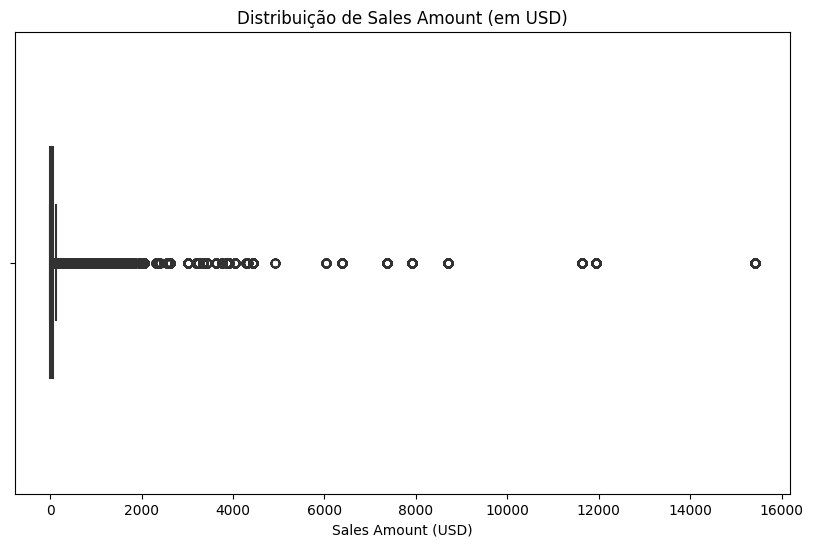

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que dados8 seja o seu DataFrame
# Substitua 'sales_amount_usd' pela coluna de interesse
#sns.set(style="whitegrid")  # Define o estilo do gráfico

# Ajusta a escala para melhor visualização
plt.figure(figsize=(10, 6))

# Personaliza o boxplot com a cor desejada
sns.boxplot(x=dados8['sales_amount_usd'], color='#9C0E0A', width=0.5, linewidth=1.5)

# Adiciona título e rótulos aos eixos
plt.title('Distribuição de Sales Amount (em USD)')
plt.xlabel('Sales Amount (USD)')

# Exibe o gráfico
plt.show()



##### **Gráfico Boxplot 2**

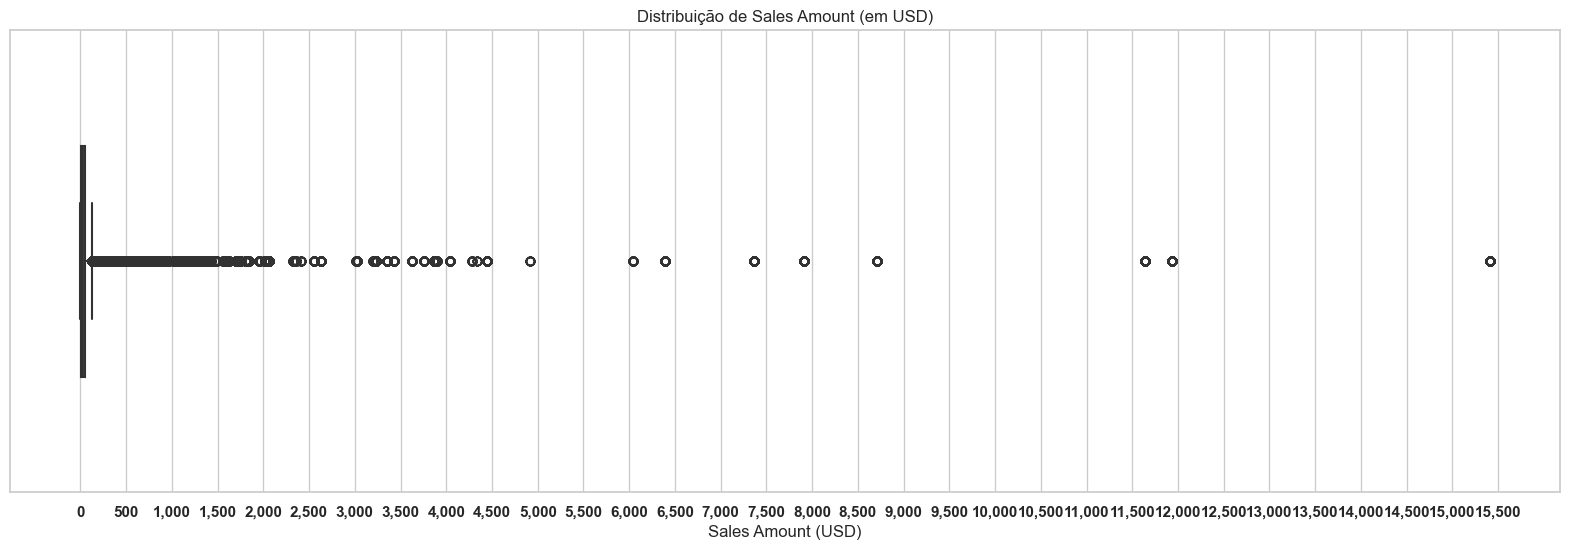

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Supondo que dados8 seja o seu DataFrame
# Substitua 'sales_amount_usd' pela coluna de interesse
sns.set(style="whitegrid")  # Define o estilo do gráfico

# Ajusta a escala e largura da figura para melhor visualização
plt.figure(figsize=(20, 6))

# Personaliza o boxplot com a cor vermelho escuro
sns.boxplot(x=dados8['sales_amount_usd'], color='#9C0E0A', width=0.5, linewidth=1.5)

# Adiciona título e rótulos aos eixos
plt.title('Distribuição de Sales Amount (em USD)')
plt.xlabel('Sales Amount (USD)')

# Personaliza os ticks no eixo x para aparecerem em intervalos de 500 e em negrito
intervalos_ticks = np.arange(0, dados8['sales_amount_usd'].max() + 500, 500)
plt.xticks(intervalos_ticks, [f'{int(tick):,}' for tick in intervalos_ticks], weight='bold')

# Exibe o gráfico
plt.show()


#### **Escolhendo o ponto de corte para outliers**
O objetivo é definir um ponto para que serão considerados outliers. Para isso, será identificado valores extremos que podem ter um impacto significativo na análise. 
<br><br>
O ponto de corte escolhido são valores maiores que 500.
<br><br>
<center>
<img src="../Imagens/Limpeza_e_Transformação/ponto_de_outliers1.1.png" width="100%">
</center>

<br>

**Identificando em quantas linhas o valor é maior ou igual a 1.500**

In [28]:
total_de_linhas = len(dados8)

#Número de linhas com sales_amount_usd maior ou igual a 1500
numero_de_linhas_sales_amount_usd_maior_ou_igual_1500 = len(dados8[dados8["sales_amount_usd"] >= 1500])

#Porcentagem de linhas com sales_amount_usd maior ou igual a 1500
porcentagem_sales_amount_usd_maior_que_1500 = (numero_de_linhas_sales_amount_usd_maior_ou_igual_1500 / total_de_linhas) * 100


#Número de linhas com sales_amount_usd menor que  1500
numero_de_linhas_sales_amount_usd_menor_1500 = len(dados8[dados8["sales_amount_usd"] < 1500])

#Porcentagem de linhas com sales_amount_usd menor 1500
porcentagem_sales_amount_usd_menor_1500 = (numero_de_linhas_sales_amount_usd_menor_1500 / total_de_linhas) * 100

print(f"O número de linhas de 'sales_amount_usd' cujo valor é maior ou igual a 1500 é {numero_de_linhas_sales_amount_usd_maior_ou_igual_1500}")
print(f"A porcentagem de linhas onde 'sales_amount_usd' maior ou igual a 1500 em relação ao total é: {porcentagem_sales_amount_usd_maior_que_1500:.2f}%")
print("")
print(f"O número de linhas de 'sales_amount_usd' cujo valor é menor que 1500 é {numero_de_linhas_sales_amount_usd_menor_1500}")
print(f"A porcentagem de linhas onde 'sales_amount_usd' é menor que  1500 em relação ao total é: {porcentagem_sales_amount_usd_menor_1500:.2f}%")


O número de linhas de 'sales_amount_usd' cujo valor é maior ou igual a 1500 é 7271
A porcentagem de linhas onde 'sales_amount_usd' maior ou igual a 1500 em relação ao total é: 1.09%

O número de linhas de 'sales_amount_usd' cujo valor é menor que 1500 é 662391
A porcentagem de linhas onde 'sales_amount_usd' é menor que  1500 em relação ao total é: 98.91%


**Identificando em quantas linhas o valor é maior ou igual a 1.000**

In [29]:
total_de_linhas = len(dados8)

#Número de linhas com sales_amount_usd maior ou igual a 1000
numero_de_linhas_sales_amount_usd_maior_ou_igual_1000 = len(dados8[dados8["sales_amount_usd"] >= 1000])

#Porcentagem de linhas com sales_amount_usd maior ou igual a 1000
porcentagem_sales_amount_usd_maior_que_1000 = (numero_de_linhas_sales_amount_usd_maior_ou_igual_1000 / total_de_linhas) * 100


#Número de linhas com sales_amount_usd menor que  1000
numero_de_linhas_sales_amount_usd_menor_1000 = len(dados8[dados8["sales_amount_usd"] < 1000])

#Porcentagem de linhas com sales_amount_usd menor 1000
porcentagem_sales_amount_usd_menor_1000 = (numero_de_linhas_sales_amount_usd_menor_1000 / total_de_linhas) * 100

print(f"O número de linhas de 'sales_amount_usd' cujo valor é maior ou igual a 1000 é {numero_de_linhas_sales_amount_usd_maior_ou_igual_1000}")
print(f"A porcentagem de linhas onde 'sales_amount_usd' maior ou igual a 1000 em relação ao total é: {porcentagem_sales_amount_usd_maior_que_1000:.2f}%")
print("")
print(f"O número de linhas de 'sales_amount_usd' cujo valor é menor que 1000 é {numero_de_linhas_sales_amount_usd_menor_1000}")
print(f"A porcentagem de linhas onde 'sales_amount_usd' menor que 1000 em relação ao total é: {porcentagem_sales_amount_usd_menor_1000:.2f}%")


O número de linhas de 'sales_amount_usd' cujo valor é maior ou igual a 1000 é 11311
A porcentagem de linhas onde 'sales_amount_usd' maior ou igual a 1000 em relação ao total é: 1.69%

O número de linhas de 'sales_amount_usd' cujo valor é menor que 1000 é 658351
A porcentagem de linhas onde 'sales_amount_usd' menor que 1000 em relação ao total é: 98.31%


<br>

**Identificando em quantas linhas o valor é maior ou igual a 500**

In [30]:
total_de_linhas = len(dados8)

#Número de linhas com sales_amount_usd maior ou igual a 500
numero_de_linhas_sales_amount_usd_maior_ou_igual_500 = len(dados8[dados8["sales_amount_usd"] >= 500])

#Porcentagem de linhas com sales_amount_usd maior ou igual a 500
porcentagem_sales_amount_usd_maior_que_500 = (numero_de_linhas_sales_amount_usd_maior_ou_igual_500 / total_de_linhas) * 100


#Número de linhas com sales_amount_usd menor que  500
numero_de_linhas_sales_amount_usd_menor_500 = len(dados8[dados8["sales_amount_usd"] < 500])

#Porcentagem de linhas com sales_amount_usd menor 500
porcentagem_sales_amount_usd_menor_500 = (numero_de_linhas_sales_amount_usd_menor_500 / total_de_linhas) * 100

print(f"O número de linhas de 'sales_amount_usd' cujo valor é maior ou igual a 500 é {numero_de_linhas_sales_amount_usd_maior_ou_igual_500}")
print(f"A porcentagem de linhas onde 'sales_amount_usd' maior ou igual a 500 em relação ao total é: {porcentagem_sales_amount_usd_maior_que_500:.2f}%")
print("")
print(f"O número de linhas de 'sales_amount_usd' cujo valor é menor que 500 é {numero_de_linhas_sales_amount_usd_menor_500}")
print(f"A porcentagem de linhas onde 'sales_amount_usd' menor que 500 em relação ao total é: {porcentagem_sales_amount_usd_menor_500:.2f}%")


O número de linhas de 'sales_amount_usd' cujo valor é maior ou igual a 500 é 26434
A porcentagem de linhas onde 'sales_amount_usd' maior ou igual a 500 em relação ao total é: 3.95%

O número de linhas de 'sales_amount_usd' cujo valor é menor que 500 é 643228
A porcentagem de linhas onde 'sales_amount_usd' menor que 500 em relação ao total é: 96.05%


**Identificando em quantas linhas o valor é maior ou igual a 400**

In [31]:
total_de_linhas = len(dados8)

#Número de linhas com sales_amount_usd maior ou igual a 400
numero_de_linhas_sales_amount_usd_maior_ou_igual_400 = len(dados8[dados8["sales_amount_usd"] >= 400])

#Porcentagem de linhas com sales_amount_usd maior ou igual a 400
porcentagem_sales_amount_usd_maior_que_400 = (numero_de_linhas_sales_amount_usd_maior_ou_igual_400 / total_de_linhas) * 100


#Número de linhas com sales_amount_usd menor que 400
numero_de_linhas_sales_amount_usd_menor_400 = len(dados8[dados8["sales_amount_usd"] < 400])

#Porcentagem de linhas com sales_amount_usd menor 400
porcentagem_sales_amount_usd_menor_400 = (numero_de_linhas_sales_amount_usd_menor_400 / total_de_linhas) * 100

print(f"O número de linhas de 'sales_amount_usd' cujo valor é maior ou igual a 400 é {numero_de_linhas_sales_amount_usd_maior_ou_igual_400}")
print(f"A porcentagem de linhas onde 'sales_amount_usd' maior ou igual a 400 em relação ao total é: {porcentagem_sales_amount_usd_maior_que_400:.2f}%")
print("")
print(f"O número de linhas de 'sales_amount_usd' cujo valor é menor que 400 é {numero_de_linhas_sales_amount_usd_menor_400}")
print(f"A porcentagem de linhas onde 'sales_amount_usd' maior 400 em relação ao total é: {porcentagem_sales_amount_usd_menor_400:.2f}%")

O número de linhas de 'sales_amount_usd' cujo valor é maior ou igual a 400 é 33960
A porcentagem de linhas onde 'sales_amount_usd' maior ou igual a 400 em relação ao total é: 5.07%

O número de linhas de 'sales_amount_usd' cujo valor é menor que 400 é 635702
A porcentagem de linhas onde 'sales_amount_usd' maior 400 em relação ao total é: 94.93%


**Identificando em quantas linhas o valor é maior ou igual a 300**

In [32]:
total_de_linhas = len(dados8)

#Número de linhas com sales_amount_usd maior ou igual a 300
numero_de_linhas_sales_amount_usd_maior_ou_igual_300 = len(dados8[dados8["sales_amount_usd"] >= 300])

#Porcentagem de linhas com sales_amount_usd maior ou igual a 300
porcentagem_sales_amount_usd_maior_que_300 = (numero_de_linhas_sales_amount_usd_maior_ou_igual_300 / total_de_linhas) * 100


#Número de linhas com sales_amount_usd menor que 300
numero_de_linhas_sales_amount_usd_menor_300 = len(dados8[dados8["sales_amount_usd"] < 300])

#Porcentagem de linhas com sales_amount_usd menor 300
porcentagem_sales_amount_usd_menor_300 = (numero_de_linhas_sales_amount_usd_menor_300 / total_de_linhas) * 100

print(f"O número de linhas de 'sales_amount_usd' cujo valor é maior ou igual a 300 é {numero_de_linhas_sales_amount_usd_maior_ou_igual_300}")
print(f"A porcentagem de linhas onde 'sales_amount_usd' maior ou igual a 300 em relação ao total é: {porcentagem_sales_amount_usd_maior_que_300:.2f}%")
print("")
print(f"O número de linhas de 'sales_amount_usd' cujo valor é menor que 300 é {numero_de_linhas_sales_amount_usd_menor_300}")
print(f"A porcentagem de linhas onde 'sales_amount_usd' menor que 300 em relação ao total é: {porcentagem_sales_amount_usd_menor_300:.2f}%")

O número de linhas de 'sales_amount_usd' cujo valor é maior ou igual a 300 é 47749
A porcentagem de linhas onde 'sales_amount_usd' maior ou igual a 300 em relação ao total é: 7.13%

O número de linhas de 'sales_amount_usd' cujo valor é menor que 300 é 621913
A porcentagem de linhas onde 'sales_amount_usd' menor que 300 em relação ao total é: 92.87%


### Sales_qty

In [33]:
res(dados8['sales_qty'])

count           669662.00
mean                12.59
median (50%)         2.00
std                 36.45
min                  1.00
max                778.00
25%                  1.00
50%                  2.00
75%                  9.00
Name: sales_qty, dtype: float64

#### **Gráfico Boxplot** {#grafico-boxplot}

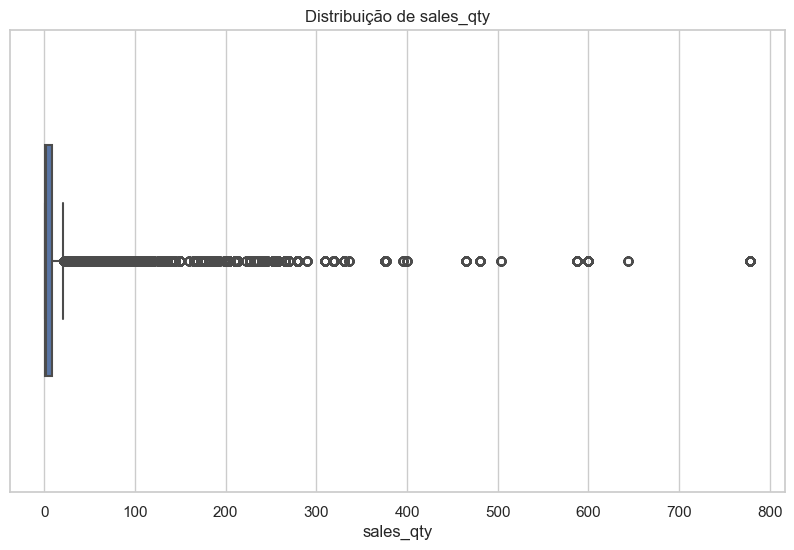

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set(style="whitegrid")  # Define o estilo do gráfico

# Ajusta a escala para melhor visualização
plt.figure(figsize=(10, 6))

# Personaliza o boxplot com a cor desejada
sns.boxplot(x=dados8['sales_qty'], width=0.5, linewidth=1.5)

# Adiciona título e rótulos aos eixos
plt.title('Distribuição de sales_qty')
plt.xlabel('sales_qty')

# Exibe o gráfico
plt.show()

#### **Escolher o ponto de corte para outliers**
Pensando de maneira conservadora, o ponto escolhido será de 40 unidades.

<br>
<center>
<img src="../Imagens/Limpeza_e_Transformação/ponto_de_outliers2.2.png" width="100%">
</center>

<br>

<br>

**Identificando em quantas linhas o valor é maior ou igual a 100**

In [35]:
total_de_linhas = len(dados8)

#Número de linhas com sales_qty maior ou igual a 100
numero_de_linhas_sales_qty_maior_ou_igual_100 = len(dados8[dados8['sales_qty'] >= 100])

#Porcentagem de linhas com sales_qty maior ou igual a 100
porcentagem_sales_qty_maior_que_100 = (numero_de_linhas_sales_qty_maior_ou_igual_100 / total_de_linhas) * 100


#Número de linhas com sales_qty menor que  100
numero_de_linhas_sales_qty_menor_100 = len(dados8[dados8['sales_qty'] < 100])

#Porcentagem de linhas com sales_qty menor 100
porcentagem_sales_qty_menor_100 = (numero_de_linhas_sales_qty_menor_100 / total_de_linhas) * 100

print(f"O número de linhas de 'sales_qty' cujo valor é maior ou igual a 100 é {numero_de_linhas_sales_qty_maior_ou_igual_100}")
print(f"A porcentagem de linhas onde 'sales_qty' maior ou igual a  100 em relação ao total é: {porcentagem_sales_qty_maior_que_100:.2f}%")
print("")
print(f"O número de linhas de 'sales_qty' cujo valor é menor que 100 é {numero_de_linhas_sales_qty_menor_100}")
print(f"A porcentagem de linhas onde 'sales_qty' menor que 100 em relação ao total é: {porcentagem_sales_qty_menor_100:.2f}%")

O número de linhas de 'sales_qty' cujo valor é maior ou igual a 100 é 14659
A porcentagem de linhas onde 'sales_qty' maior ou igual a  100 em relação ao total é: 2.19%

O número de linhas de 'sales_qty' cujo valor é menor que 100 é 655003
A porcentagem de linhas onde 'sales_qty' menor que 100 em relação ao total é: 97.81%


<br>

**Identificando em quantas linhas o valor é maior ou igual a 50**

In [36]:
total_de_linhas = len(dados8)

#Número de linhas com sales_qty maior ou igual a 50
numero_de_linhas_sales_qty_maior_ou_igual_50 = len(dados8[dados8['sales_qty'] >= 50])

#Porcentagem de linhas com sales_qty maior ou igual a 50
porcentagem_sales_qty_maior_que_50 = (numero_de_linhas_sales_qty_maior_ou_igual_50 / total_de_linhas) * 100


#Número de linhas com sales_qty menor que  30
numero_de_linhas_sales_qty_menor_50 = len(dados8[dados8['sales_qty'] < 50])

#Porcentagem de linhas com sales_qty menor 30
porcentagem_sales_qty_menor_50 = (numero_de_linhas_sales_qty_menor_50 / total_de_linhas) * 100

print(f"O número de linhas de 'sales_qty' cujo valor é maior ou igual a 50 é {numero_de_linhas_sales_qty_maior_ou_igual_50}")
print(f"A porcentagem de linhas onde 'sales_qty' maior ou igual a  50 em relação ao total é: {porcentagem_sales_qty_maior_que_50:.2f}%")
print("")
print(f"O número de linhas de 'sales_qty' cujo valor é menor que 50 é {numero_de_linhas_sales_qty_menor_50}")
print(f"A porcentagem de linhas onde 'sales_qty' menor que 50 em relação ao total é: {porcentagem_sales_qty_menor_50:.2f}%")


O número de linhas de 'sales_qty' cujo valor é maior ou igual a 50 é 35854
A porcentagem de linhas onde 'sales_qty' maior ou igual a  50 em relação ao total é: 5.35%

O número de linhas de 'sales_qty' cujo valor é menor que 50 é 633808
A porcentagem de linhas onde 'sales_qty' menor que 50 em relação ao total é: 94.65%


**Identificando em quantas linhas o valor é maior ou igual a 40**

In [37]:
total_de_linhas = len(dados8)

#Número de linhas com sales_qty maior ou igual a 40
numero_de_linhas_sales_qty_maior_ou_igual_40 = len(dados8[dados8['sales_qty'] >= 40])

#Porcentagem de linhas com sales_qty maior ou igual a 40
porcentagem_sales_qty_maior_que_40 = (numero_de_linhas_sales_qty_maior_ou_igual_40 / total_de_linhas) * 100


#Número de linhas com sales_qty menor que  40
numero_de_linhas_sales_qty_menor_40 = len(dados8[dados8['sales_qty'] < 40])

#Porcentagem de linhas com sales_qty menor 40
porcentagem_sales_qty_menor_40 = (numero_de_linhas_sales_qty_menor_40 / total_de_linhas) * 100

print(f"O número de linhas de 'sales_qty' cujo valor é maior ou igual a 40 é {numero_de_linhas_sales_qty_maior_ou_igual_40}")
print(f"A porcentagem de linhas onde 'sales_qty' maior ou igual a  40 em relação ao total é: {porcentagem_sales_qty_maior_que_40:.2f}%")
print("")
print(f"O número de linhas de 'sales_qty' cujo valor é menor que 40 é {numero_de_linhas_sales_qty_menor_40}")
print(f"A porcentagem de linhas onde 'sales_qty' maior 40 em relação ao total é: {porcentagem_sales_qty_menor_40:.2f}%")


O número de linhas de 'sales_qty' cujo valor é maior ou igual a 40 é 47883
A porcentagem de linhas onde 'sales_qty' maior ou igual a  40 em relação ao total é: 7.15%

O número de linhas de 'sales_qty' cujo valor é menor que 40 é 621779
A porcentagem de linhas onde 'sales_qty' maior 40 em relação ao total é: 92.85%


**Identificando em quantas linhas o valor é maior ou igual a 30**

In [38]:
total_de_linhas = len(dados8)

#Número de linhas com sales_qty maior ou igual a 30
numero_de_linhas_sales_qty_maior_ou_igual_30 = len(dados8[dados8['sales_qty'] >= 30])

#Porcentagem de linhas com sales_qty maior ou igual a 30
porcentagem_sales_qty_maior_que_30 = (numero_de_linhas_sales_qty_maior_ou_igual_30 / total_de_linhas) * 100


#Número de linhas com sales_qty menor que  30
numero_de_linhas_sales_qty_menor_30 = len(dados8[dados8['sales_qty'] < 30])

#Porcentagem de linhas com sales_qty menor 30
porcentagem_sales_qty_menor_30 = (numero_de_linhas_sales_qty_menor_30 / total_de_linhas) * 100

print(f"O número de linhas de 'sales_qty' cujo valor é maior ou igual a 30 é {numero_de_linhas_sales_qty_maior_ou_igual_30}")
print(f"A porcentagem de linhas onde 'sales_qty' maior ou igual a  30 em relação ao total é: {porcentagem_sales_qty_maior_que_30:.2f}%")
print("")
print(f"O número de linhas de 'sales_qty' cujo valor é menor que 30 é {numero_de_linhas_sales_qty_menor_30}")
print(f"A porcentagem de linhas onde 'sales_qty' maior 30 em relação ao total é: {porcentagem_sales_qty_menor_30:.2f}%")


O número de linhas de 'sales_qty' cujo valor é maior ou igual a 30 é 63168
A porcentagem de linhas onde 'sales_qty' maior ou igual a  30 em relação ao total é: 9.43%

O número de linhas de 'sales_qty' cujo valor é menor que 30 é 606494
A porcentagem de linhas onde 'sales_qty' maior 30 em relação ao total é: 90.57%


**Identificando em quantas linhas o valor é maior ou igual a 20**

In [39]:
total_de_linhas = len(dados8)

#Número de linhas com sales_qty maior ou igual a 20
numero_de_linhas_sales_qty_maior_ou_igual_20 = len(dados8[dados8['sales_qty'] >= 20])

#Porcentagem de linhas com sales_qty maior ou igual a 20
porcentagem_sales_qty_maior_que_20 = (numero_de_linhas_sales_qty_maior_ou_igual_20 / total_de_linhas) * 100


#Número de linhas com sales_qty menor que  20
numero_de_linhas_sales_qty_menor_20 = len(dados8[dados8['sales_qty'] < 20])

#Porcentagem de linhas com sales_qty menor 30
porcentagem_sales_qty_menor_20 = (numero_de_linhas_sales_qty_menor_20 / total_de_linhas) * 100

print(f"O número de linhas de 'sales_qty' cujo valor é maior ou igual a 20 é {numero_de_linhas_sales_qty_maior_ou_igual_20}")
print(f"A porcentagem de linhas onde 'sales_qty' maior ou igual a  20 em relação ao total é: {porcentagem_sales_qty_maior_que_20:.2f}%")
print("")
print(f"O número de linhas de 'sales_qty' cujo valor é menor que 20 é {numero_de_linhas_sales_qty_menor_20}")
print(f"A porcentagem de linhas onde 'sales_qty' maior 20 em relação ao total é: {porcentagem_sales_qty_menor_20:.2f}%")


O número de linhas de 'sales_qty' cujo valor é maior ou igual a 20 é 94176
A porcentagem de linhas onde 'sales_qty' maior ou igual a  20 em relação ao total é: 14.06%

O número de linhas de 'sales_qty' cujo valor é menor que 20 é 575486
A porcentagem de linhas onde 'sales_qty' maior 20 em relação ao total é: 85.94%


<br>

#### **Retirar as Outliers**

**Sales amount**

In [40]:
dados8 = dados8[dados8['sales_amount_usd'] < 500]

In [41]:
#Verificar a quantidade de linhas
len(dados8)

643228

In [42]:
#Checar se deu certo
# Contando o número de linhas que estão acima de 900
quant_de_linhas_500 = dados8["sales_amount_usd"].loc[dados8["sales_amount_usd"] > 500].value_counts().size
quant_de_linhas_500

0

<br>
<b>Sales qty</b>

In [43]:
dados8a = dados8[dados8["sales_qty"] < 40]

In [44]:
#Checar se deu certo
# Contando o número de linhas que estão acima de 3
quant_de_linhas_100 = dados8a["sales_qty"].loc[dados8a["sales_qty"] > 40].value_counts().size
quant_de_linhas_100

0

In [45]:
#Verificar a quantidade de linhas
len(dados8)

643228

**Criar nova tabela**

In [46]:
#Salvar tabela dados8
dados8a.to_csv("../Outros_datasets/dados8.csv", index=False)

In [47]:
import pandas as pd
#Criar tabela dados9
dados8=pd.read_csv("../Outros_datasets/dados8.csv")
dados9=dados8

## Retirar colunas
Será retirado 4 colunas pois estas não serão usadas nem na análise descritiva e nem na modelagem. As colunas são: <br>
- **'lic_no':** número da licença do restaurante. <br>
- **'link':** link para o site do restaurante . <br>
- **'address':** endereço do restaurante.<br>
- **'email':** email dos clientes

In [48]:
dados9 = dados9.drop('lic_no', axis=1)
dados9=dados9.drop('link', axis=1)
dados9=dados9.drop('address', axis=1)
dados9=dados9.drop('email', axis=1)

## Salvar tabela para Análise Descritiva
As modificações feitas até agora serão salvas numa tabela. E esta será utilizada na análise descritiva 

In [49]:
dados9.to_csv('../Outros_datasets/dados9_tabela_para_analise_descritiva.csv', index=False)

----- //----
</div>